
# Project: Data Analysis of Medical Appointment No Shows Case Study

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>In this project, we will analyse a dataset for medical appointments. This dataset includes information about patients such as gender, type of illness, their neighborhood and whether they have received an SMS prior to their appointments. We will try to find out the factors that affect patients showing up for their scheduled appointmnets.  In particular, we will try to answer the following quetions:<ol style = "color:green;">
    <li> What is the percentage of patients showing up above and under 30 years? </li>
    <li> Is there a relation between gender and showing up at the appointmnets?</li>
    <li> Does sending an SMS affects showing up for the medical appointments?</li>
    <li> Is there a relation between the type of disease and not showing up?</li>
</ol>    

>The dependent variable: No-show <br>
The independent variables: Age, Neighbourhood, Scholarship, Hipertension, etc.

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Plot visualizations inline
% matplotlib inline

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()
# types and look for instances of missing or possibly errant data.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# know the number of samples and the number of features 
df.shape

(110527, 14)

In [4]:
# know about the general characteristics in our dataset like mean and standard deviation
df.describe() 

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning (Replace this with more specific notes!)
In data cleaning we might face more than one problem. In the following, potential problems are tested and fixed if found. <br>

**Checking for missing data**<br>
From the dimensions of the dataset and 'info()', this dataset has no missing data

In [5]:
# Test dataset for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# The min age is -1. Maybe it refers to pregnent women, or maybe it's a human mistake. However, it affects 
#the mean the other statistical properties. It would be better to change all values of "-1" to "0" 
df.loc[df['Age']==-1,'Age'] = 0
#make sure the modifications took place
df.describe() 
#changing -1 to 0 doesn't seem to have a noticeable effect on the values

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088883,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110190,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Checking the dataset for duplicate rows**<br>
from duplicated(), the dataset has no duplicates

In [7]:
sum(df.duplicated())

0

<b>Remove irrelevant columns</b>

In [8]:
#it seems PatientID and AppointmentID are irrelevant to our analysis, so I am going to drop these two columns
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
#make sure modifications took place
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<b> Change upper case to lower case </b>

In [9]:
#It is more appropriate change features' labels to lower case and the label 'No-show' to have an '_' instead of '-'. 
df.rename(columns=lambda x: x.strip().lower().replace("-","_"), inplace=True)
#make sure modifications took place
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<b>It will be useful to change 'No' and 'Yes' in 'no_show' to 0 and 1 respectively</b>

In [10]:
df.loc[df['no_show']=='No','no_show'] = 0
df.loc[df['no_show']=='Yes','no_show'] = 1
# make sure modifications took place
df['no_show'].value_counts()

0    88208
1    22319
Name: no_show, dtype: int64

In [11]:
df.scholarship.value_counts()

0    99666
1    10861
Name: scholarship, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

In [12]:
#It might be useful to factor our dataset to two seperate dataset associated with showing and not showing, to study
#their characterstics seperately
df_show = df[df['no_show']== 0] # dataset for patients who had shown up
df_noshow = df[df['no_show']== 1] # dataset for patients who did not show up

In [13]:
# see the characterstics of patients who have shown up
df_show.describe()
# they have a mean of about 38 years old

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
count,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.0
mean,37.790076,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334,0.0
std,23.338860,0.291695,0.403259,0.261507,0.171732,0.162750,0.454380,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.0


In [14]:
# see the characterstics of patients who  did not shown up
df_noshow.describe()
# they have a mean of about 34 years old

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
count,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.0
mean,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371,1.0
std,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.0


### Research Question 1: What is the percentage of patients showing up above and under 30 years?

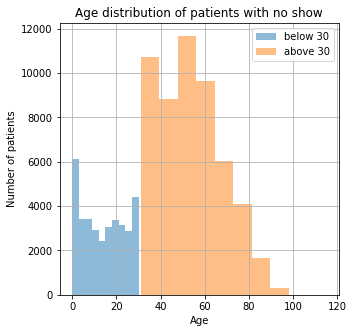

In [15]:
below_s = df_show[df_show['age']<=30].age # patients who are less than or equal 30 years old who have shown up
above_s = df_show[df_show['age']>30].age # patients who are more than 30 years old who have shown up
# draw a histogram for the two variables
below_s.hist(figsize=(5,5), alpha = 0.5, label = 'below 30');
above_s.hist(figsize=(5,5), alpha = 0.5, label = 'above 30');
plt.legend();plt.title('Age distribution of patients with no show'); plt.xlabel('Age');plt.ylabel('Number of patients');

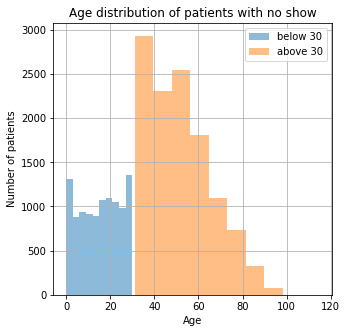

In [16]:
below_n = df_noshow[df_noshow['age']<=30].age # patients who are less than or equal 30 years old who did not show up
above_n = df_noshow[df_noshow['age']>30].age # patients who are more than 30 years old who did not show up
# draw a histogram for the two variables
below_n.hist(figsize=(5,5), alpha = 0.5, label = 'below 30');
above_n.hist(figsize=(5,5), alpha = 0.5, label = 'above 30');
plt.legend();plt.title('Age distribution of patients with no show'); plt.xlabel('Age');plt.ylabel('Number of patients');

From the histogram there does not seem to be a correltion between age and showing to medical appointments <br>
So, let's have a look at some statistics

In [17]:
total_s = df_show['age'] # total patients who have shown up
len(below_s)/len(total_s) # percentage of patients less than 30 years old to total patients, that have shown up

0.3983992381643388

In [18]:
total_n = df_noshow['age'] # total patients who did not show up
len(below_n)/len(total_n) # percentage of patients less than 30 years old to total patients, that have not shown up

0.4700031363412339

In [19]:
total_under30 = df[df['age']<=30].age # total patients under or equal to 30 years old
len(below_n)/len(total_under30) # percentage of patients under or equal 30 years old who have not shown up to total number of 
# patients under 30  

0.22988253856942498

In [20]:
total_above30 = df[df['age']>30].age # total patients more than 30 years old
len(above_n)/len(total_above30) # percentage of patients more than 30 years old who have not shown up to total number of 
# patients more than 30  

0.18227906618383544

<b>Note</b> <br>
47% of patients who don't show are under 30
39% of patients who show are under 30. 
22% of patients under 30 miss their appointments while 18% of patients above 30 years miss their appointments. 

Percentage of older people is heigher than younger people both in showing up and not showing up to the appointments. However, the percentage of older people who show up is higher that the percentage of older people who don't show up <br>
<b>Conclusion</b>: The older the person, the less propable they miss the appointment 

### Research Question 2: Is there a relation between gender and showing up at the appointmnets

In [21]:
# Fisrt let's see the number of females and males in our dataset
df['gender'].value_counts()

F    71840
M    38687
Name: gender, dtype: int64

<b>Note</b>: There are much more females than males in our dataset. This biasness should be taken into consideration while making conclusions 

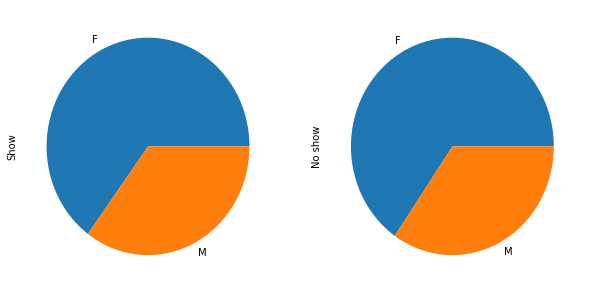

In [22]:
#Now, let's see the distribution of females and males in both showing and not showing in a pie chart
plt.subplot(1, 2, 1)
df_show['gender'].value_counts().plot(kind = 'pie', figsize=(10,5), label ='Show');
plt.subplot(1, 2, 2)
df_noshow['gender'].value_counts().plot(kind = 'pie', figsize=(10,5), label = 'No show');

<b>Note</b><br>
From the pie chart, it seems that more females than males show up at their appointments. However, we should not forget that the dataset itself has more females than males. Therefore, let's look at some percentages. 

In [23]:
total_m = len(df[df['gender']=='M']['gender']) # number of males in our dataset
show_m = len(df_show[df_show['gender']=='M']['gender']) # number of males that show up 
show_m/total_m # percentage of men who show up 

0.8003205211052808

In [24]:
total_f = len(df[df['gender']=='F']['gender']) # number of females in our dataset
show_f = len(df_show[df_show['gender']=='F']['gender']) # number of females who show up
show_f/total_f #percentage of females who show up 

0.7968541202672605

<b>Note</b><br>
80% of males show up <br>
79.6% of females show up <br>
<b>Conclusion</b>: Gender does not seem to affect showing up at medical appointments

### Research Question 3: Does sending an SMS affects showing up for the medical appointments?

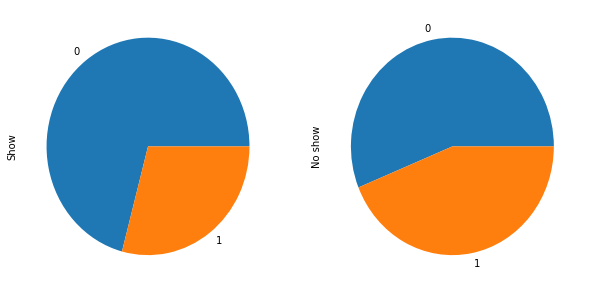

In [25]:
plt.subplot(1, 2, 1)
# in pie chart, visualize the number of patients who received an sms
df_show['sms_received'].value_counts().plot(kind = 'pie', figsize=(10,5), label ='Show');
plt.subplot(1, 2, 2)
df_noshow['sms_received'].value_counts().plot(kind = 'pie', figsize=(10,5), label = 'No show');

In [26]:
total_sms1 = len(df[df['sms_received'] == 1]['sms_received']) # total number of sms received 
show_sms1 = len(df_show[df_show['sms_received'] == 1]['sms_received']) # patients who have received sms and shown up 
show_sms1 /total_sms1 # percentage of patients shown up to total number who have received sms 

0.7242545516036301

In [27]:
total_sms0 = len(df[df['sms_received'] == 0]['sms_received']) # total number of patients who did not receive an sms
show_sms0 = len(df_show[df_show['sms_received'] == 0]['sms_received']) # patients who have not received an sms and shown up
show_sms0 /total_sms0 # percentage of patients shown up to total number who have not received an sms 

0.8329668865347458

<b>Note</b><br>
Comparing the last two value, we notice something strange. <br>
83% of patients who did not receive an sms showed up, while 72% pf patients who did receive an sms did not show up. The difference is by 11%. Could it be that sending an sms discourages patients?

### Research Question 4: Is there a relation between the type of disease and not showing up?

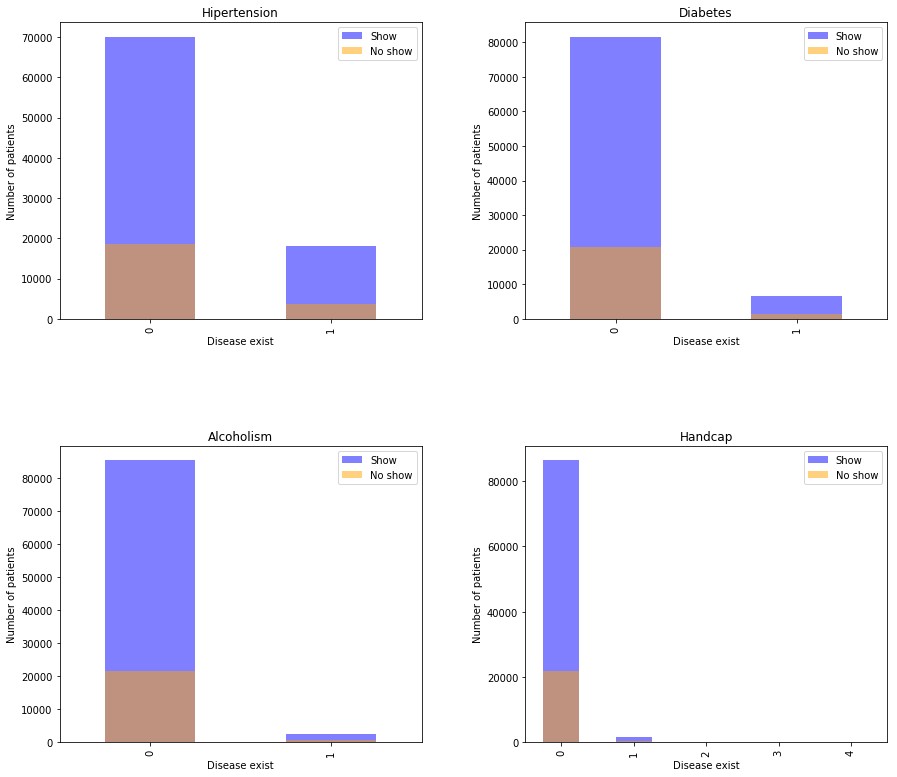

In [28]:
#https://www.kite.com/python/answers/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python

#subplot for hipertension
fig_size = (15,13)
plt.subplot(2, 2, 1)
df.hipertension[df.no_show == 0].value_counts().plot(kind = 'bar', alpha = 0.5, label = 'Show', color = 'blue', figsize=fig_size);
df.hipertension[df.no_show == 1].value_counts().plot(kind = 'bar', alpha = 0.5, label = 'No show', color = 'orange',figsize=fig_size);
plt.legend();plt.title('Hipertension'); plt.xlabel('Disease exist');plt.ylabel('Number of patients'); plt.tight_layout(pad=10)

#subplot for diabetes
plt.subplot(2, 2, 2)
df.diabetes[df.no_show == 0].value_counts().plot(kind = 'bar', alpha = 0.5, label = 'Show', color = 'blue', figsize=fig_size);
df.diabetes[df.no_show == 1].value_counts().plot(kind = 'bar', alpha = 0.5, label = 'No show', color = 'orange',figsize=fig_size);
plt.legend();plt.title('Diabetes'); plt.xlabel('Disease exist');plt.ylabel('Number of patients');

#subplot for alcoholism
plt.subplot(2, 2, 3)
df.alcoholism[df.no_show == 0].value_counts().plot(kind = 'bar', alpha = 0.5, label = 'Show', color = 'blue', figsize=fig_size);
df.alcoholism[df.no_show == 1].value_counts().plot(kind = 'bar', alpha = 0.5, label = 'No show', color = 'orange',figsize=fig_size);
plt.legend();plt.title('Alcoholism'); plt.xlabel('Disease exist');plt.ylabel('Number of patients');

#subplot for handcap
plt.subplot(2, 2, 4)
df.handcap[df.no_show == 0].value_counts().plot(kind = 'bar', alpha = 0.5, label = 'Show', color = 'blue', figsize=fig_size);
df.handcap[df.no_show == 1].value_counts().plot(kind = 'bar', alpha = 0.5, label = 'No show', color = 'orange',figsize=fig_size);
plt.legend();plt.title('Handcap'); plt.xlabel('Disease exist');plt.ylabel('Number of patients');

<b>Note</b><br>
From the bar chart, there doen't seem that the type of the disease affects showing up at medical appointments. <br>
Let's have a look at some numbers 

In [29]:
# There is a scale for the degree of handcap. Let's see the counts for showing and not showing
df.handcap[df.no_show == 0].value_counts(), df.handcap[df.no_show == 1].value_counts()

(0    86374
 1     1676
 2      146
 3       10
 4        2
 Name: handcap, dtype: int64, 0    21912
 1      366
 2       37
 3        3
 4        1
 Name: handcap, dtype: int64)

In [30]:
total_diabetes1 = len(df[df['diabetes'] == 1]['diabetes'])
show_diabetes1 = len(df_show[df_show['diabetes'] == 1]['diabetes'])
show_diabetes1 /total_diabetes1
# About 82% of patients who have diabetes show up for their appointments

0.8199672667757774

In [31]:
total_hipertension1 = len(df[df['hipertension'] == 1]['hipertension'])
show_hipertension1 = len(df_show[df_show['hipertension'] == 1]['hipertension'])
show_hipertension1 /total_hipertension1
# About 83% of patients who have diabetes show up for their appointments

0.8269804137424889

<a id='conclusions'></a>
## Conclusions

>By analysing the dataset in hand, we were trying to know what factors can affect patients not showing up for their medical appointments. We have studied the next features with respect to patients not showing up (the dependent variable)
><ul>
    <li> Gender </li>
    <li> Age </li>
    <li> Sending text messages </li>
    <li> Type of disease </li>
</ul>

>From visualizaions and statistical computations in the previous section, we can conclude that
    <ul>
    <li> Males and females are equally probable to show for their appointments (the gender cannot tell much about whether the patent will appear for the appointment or not)</li>
    <li> Older people are less likely to miss their medical appointments. However, the different between old and young people is not big</li>
    <li> Sending text messages appeared to have negative infuelence on patients not to show up</li>
    <li> For all the studied diseases, patients having a disease are more likely to attend than patients who don't have the disease</li>
</ul>

>Limitations: The dataset is biased in gender as it has much more females than males. 

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0